# K-Means Evaluation

This notebook demonstrates how to evaluate the clustering performance of the k-means algorithm.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, and scikit-learn.

In [5]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

## Define Colors and Generate Sample Data

Define custom colors for visualizations and generate synthetic blob data.

In [6]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#179E86", # Dark Green
    "#9EBE5B", # Light Green
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#633248", # Brown
    "#44546A", # Gray
]

# Set the seed for reproducibility.
np.random.seed(42)

# Generate sample data.
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

## Evaluate K-Means with Different K Values

Apply the elbow method to find the optimal number of clusters by testing k=2, 3, and 4.

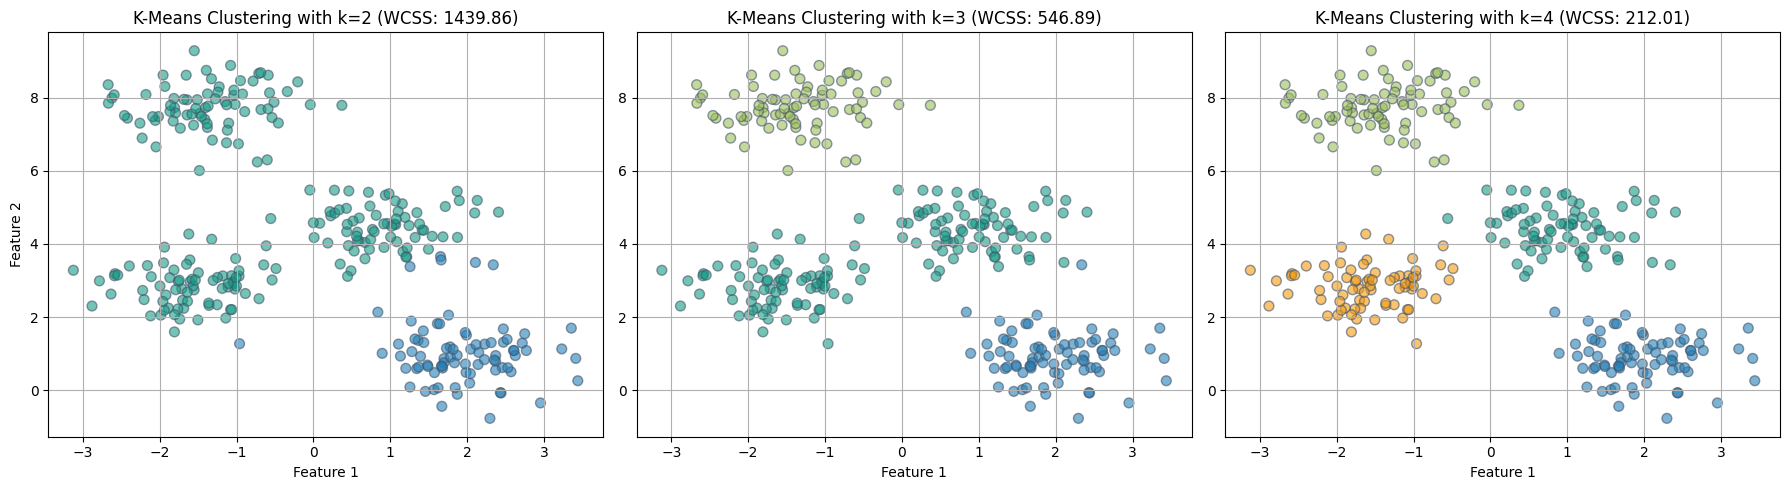

In [7]:
# Elbow method to find the optimal number of clusters.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate(range(2, 5)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Calculate WCSS (Within-Cluster Sum of Squares).
    wcss = kmeans.inertia_

    # Plot the data points and the centroids.
    axes[idx].scatter(
        X[:, 0], X[:, 1], c=[colors[int(label)] for label in kmeans.labels_],
        s=50, edgecolor=colors[-1], alpha=0.6
    )

    axes[idx].set_title(f"K-Means Clustering with k={k} (WCSS: {wcss:.2f})")
    axes[idx].set_xlabel("Feature 1")
    if idx == 0:
        axes[idx].set_ylabel("Feature 2")
    axes[idx].grid(True)

plt.tight_layout()
plt.show()